# Data Preparation

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

In [2]:
df = pd.read_csv(Path('crypto_data.csv'), index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# List dataframe data types
df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
# Count of rows with null values
df.isnull().sum()

CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [5]:
df_filtered = df[df['IsTrading'] == True] 
print(df_filtered.shape)
df_filtered.head()

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Remove the IsTrading Column
df_dropped = df_filtered.drop(columns=["IsTrading"])
print(df_dropped.shape)
df_dropped.head()

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
# Remove all rows that have at least one null value.
df_droppedna = df_dropped.dropna()
df_droppedna.shape

(685, 5)

In [8]:
# Filter for cryptocurrencies that have been mined. (greater than zero)
df_refiltered = df_droppedna[df_droppedna['TotalCoinsMined'] > 0] 
print(df_refiltered.shape)
df_refiltered.head()

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [9]:
df_redropped = df_refiltered.drop(columns=["CoinName"])
print(df_redropped.shape)
df_redropped.head()

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [10]:
X = pd.get_dummies(data=df_redropped, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler
# Create a scaler to standardize the data
scaler = StandardScaler()
# Train the scaler with the training data.
X = scaler.fit_transform(X)

# Dimensionality Reduction

In [12]:
# Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance,
# whether that means reducing the dataset to 80 principal components or 3.
# For this project, preserve 90% of the explained variance in dimensionality reduction. 
# How did the number of the features change?
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get three principal components for the data.
principal_components = pca.fit_transform(X)
principal_components.shape

(532, 74)

## Columns are reduced from 98 down to 74

In [13]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. 
# Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(principal_components)

# How many columns?
tsne_features.shape

(532, 2)

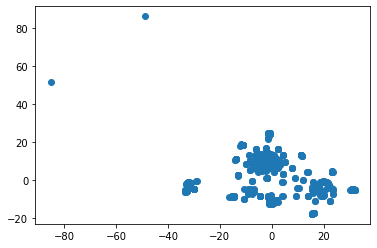

In [14]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Cluster Analysis with k-Means

In [15]:
# Create an elbow plot to identify the best number of clusters. 
# Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

from sklearn.cluster import KMeans

# Use a for-loop to determine the inertia for each k between 1 through 10. 
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\h-torihara\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,199884.031250
1,2,112063.460938
2,3,71464.835938
3,4,40960.582031
4,5,28917.009766


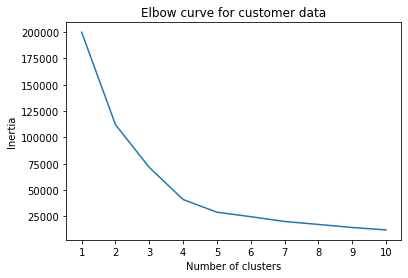

In [16]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

## The elbow curve indicates there seem to be 4 clusters

In [17]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(tsne_features)
predictions = model.predict(tsne_features)
predictions

array([2, 2, 2, 3, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 0, 2, 1, 0, 2, 2, 0, 0,
       3, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 3, 0, 0, 0, 2, 0, 0, 1, 0, 3, 1, 2, 0,
       3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3, 0, 3, 2, 1, 3, 3, 3, 1, 2,
       2, 0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 0, 0, 1, 0, 3, 2, 0, 1, 0, 2, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 2, 1, 0, 3, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 3, 2, 1, 3, 2, 0, 0, 3, 1, 0, 3, 3, 2, 2,
       1, 1, 0, 0, 0, 1, 1, 3, 0, 1, 0, 1, 1, 3, 3, 2, 1, 0, 1, 2, 2, 2,
       2, 1, 1, 0, 1, 2, 0, 3, 3, 1, 2, 0, 2, 0, 1, 3, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 2,
       3, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 3, 1, 2, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       3, 1, 0, 1, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 3, 1,

# Recommendation
## Based on above, it is determined that the cryptocurrencies can be categorized into 4 different clusters.